<a href="https://colab.research.google.com/github/VikitoHextech/TAREAS-SIMULACION/blob/main/CatalogoSimu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Catalogo de Formulas para Simulacion

# CONTINUAS:

## Forma uniforme:
The distribution function of a U(a, b) random variable is easily inverted by solving
\
$u = F(x)$ for $x$ to obtain, for 0 $\leq$ u $\leq$ 1.

$x = F^{-1}$ $(u)$ = $a + (b-a)u$

Media:
$\frac{(a+b)}{2}$

Varianza:
$\frac{(b-a)^{2}} {12}$

Desv. Est.:
$\frac{(b-a)}{4}$

Con grafica:

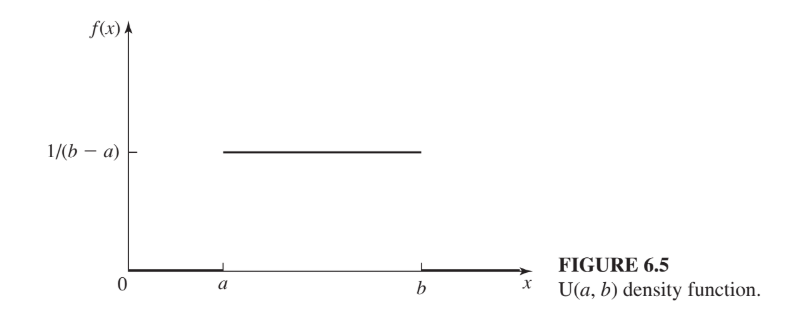

Y grafica de probabilidad acumulada:

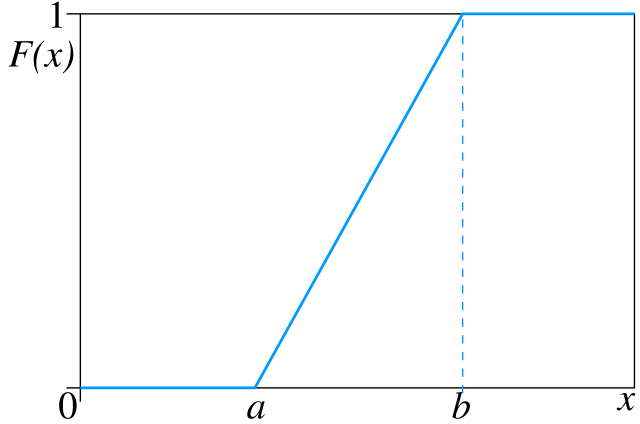

**Pseudocodigo:**

Entrada: a (límite inferior), b (límite superior)

Verificar que a < b

Generar u ← número aleatorio uniforme en (0,1)

x ← a + (b - a) * u

Devolver x

**Codigo de Python:**

In [ ]:
import numpy as np

def uniforme_continua(a, b):
    if a >= b:
        raise ValueError("El límite inferior 'a' debe ser menor que el superior 'b'")
    u = np.random.rand()  # genera número uniforme en (0,1)
    x = a + (b - a) * u
    return x

print(uniforme_continua(2, 5))  # Genera un número aleatorio entre 2 y 5

##TRIANGULAR:
La distribución triangular es una distribución continua definida por tres parámetros:

𝑎: mínimo

𝑏: máximo

𝑐: moda (el valor más probable)

La forma es una "montaña" con vértice en 𝑐, aumentando linealmente desde
𝑎 hasta 𝑐, y luego disminuyendo hasta 𝑏.

Media:
$\frac{(a+b+c)}{3}$

Varianza:
$\frac{(a^2 +b^2+c^2 - ab -ac -bc)}{18}$

Desv. Est.:
$\sqrt{\frac{(a^2 +b^2+c^2 - ab -ac -bc)}{18}}$

Con grafica de densidad y Grafica de P. Acumulada:

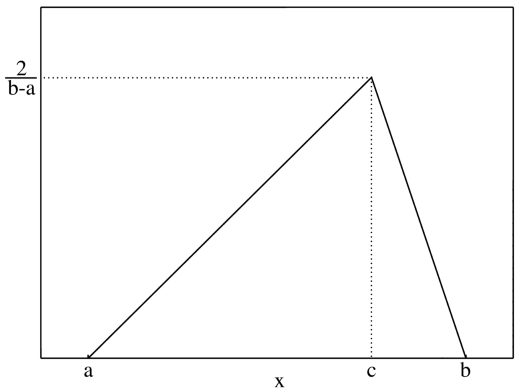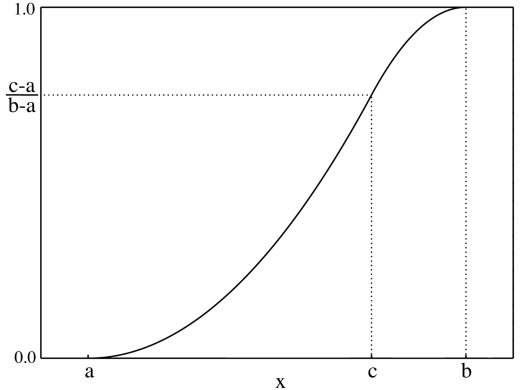

**Pseudocodigo:**

Entrada: a (mínimo), b (máximo), c (moda)

Verificar que a < c < b

Generar u ← número aleatorio uniforme en (0,1)


Si u < (c - a) / (b - a):

    x ← a + sqrt(u * (b - a) * (c - a))
    
Sino:
    x ← b - sqrt((1 - u) * (b - a) * (b - c))

Devolver x


**Codigo Python:**

In [ ]:
import numpy as np

def triangular(a, b, c):
    if not (a < c < b):
        raise ValueError("Debe cumplirse a < c < b")

    u = np.random.rand()
    fc = (c - a) / (b - a)

    if u < fc:
        x = a + np.sqrt(u * (b - a) * (c - a))
    else:
        x = b - np.sqrt((1 - u) * (b - a) * (b - c))

    return x

# Ejemplo de uso:
print(triangular(1, 5, 3))  # Valor entre 1 y 5, con moda en 3


## EXPONENCIAL:

Modelo clásico para el tiempo entre eventos en un proceso de Poisson. Con parámetro:

λ>0: tasa de ocurrencia de eventos

Y función de densidad:

f(x) = $λe^{−λx}$ ,  x≥0

Media:
$\frac{1}{\lambda}$

Varianza:
$\frac{1}{\lambda^2}$

Desv. Est.:
$\frac{1}{\lambda}$

Con graficas:

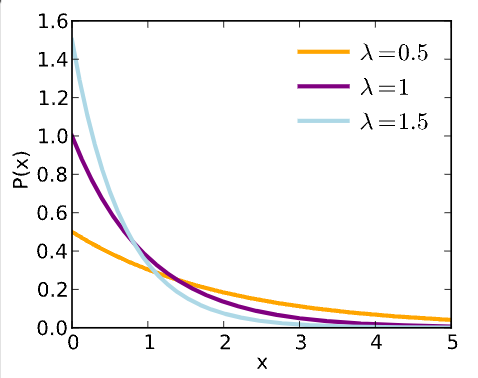

P. Acumulada:

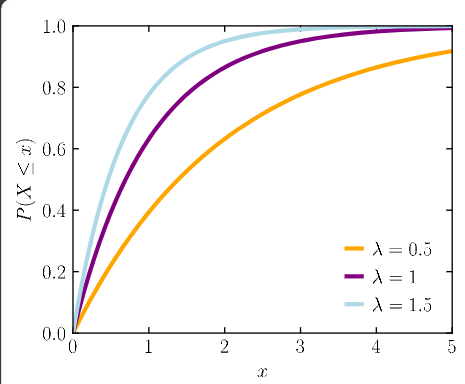

**Pseudocodigo:**

Entrada: λ (tasa)

Generar u ← número aleatorio uniforme en (0,1)

x ← -ln(1 - u) / λ

Devolver x

**Codigo Python: **

In [ ]:
import numpy as np

def exponencial(lamb):
    if lamb <= 0:
        raise ValueError("λ debe ser mayor que cero")
    u = np.random.rand()
    x = -np.log(u) / lamb
    return x

# Ejemplo:
print(exponencial(2))  # λ = 2

## M-ERLANG
Es una suma de 𝑚 variables exponenciales independientes con el mismo parámetro 𝜆. Es un caso especial de la distribución gamma cuando el parámetro de forma

𝑘 = 𝑚 , k = m es entero.

Parámetros:

𝑚: número de fases (entero)

𝜆: tasa de eventos por fase

$$f(x) = \frac{\lambda(\lambda x)^{n-1} e^{-\lambda x}}{(n-1)!}$$

Media:

$$\frac{n}{\lambda}$$

Varianza:
$$\frac{n}{\lambda^2}$$

Desv. Est.:
$$\frac{\sqrt{n}}{\lambda}$$

Con graficas:

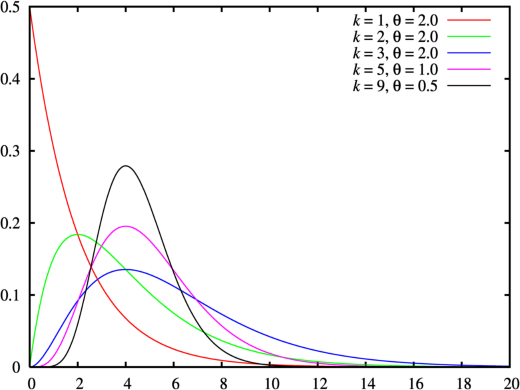

P. Acumulada:

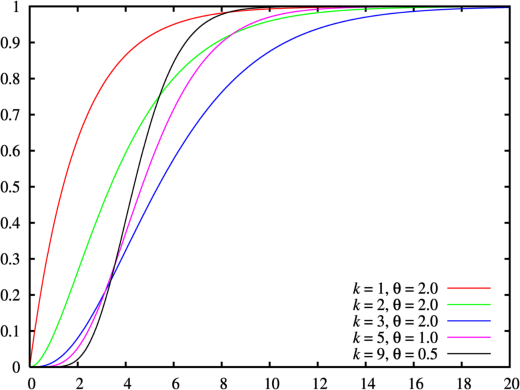

**Pseudocodigo:**

Entrada: m (entero positivo), λ (tasa)

Inicializar suma ← 0

Repetir m veces:

    Generar u ← número aleatorio uniforme en (0,1)
    x ← -ln(u) / λ
    suma ← suma + x
    
Devolver suma

**Codigo Python:**

In [ ]:
import numpy as np

def erlang(m, lamb):
    if m <= 0 or not isinstance(m, int):
        raise ValueError("m debe ser un entero positivo")
    if lamb <= 0:
        raise ValueError("λ debe ser mayor que cero")

    suma = 0
    for _ in range(m):
        u = np.random.rand()
        suma += -np.log(u) / lamb

    return suma

# Ejemplo:
print(erlang(3, 1.5))  # 3 fases, λ = 1.5

##GAMMA

Es una distribución continua que generaliza la distribución Erlang para valores reales positivos del parámetro de forma.

**Parámetros:**

- $\alpha$: parámetro de forma  
- $\lambda$: parámetro de tasa (inverso de la escala $\theta$)

**Función de densidad:**

$$f(x) = \frac{\lambda^\alpha (\lambda x)^{\alpha - 1} e^{-\lambda x}}{\Gamma(\alpha)}, \quad x > 0$$

**Media:**

$$\frac{\alpha}{\lambda}$$

**Varianza:**

$$\frac{\alpha}{\lambda^2}$$

**Desviación estándar:**

$$\frac{\sqrt{\alpha}}{\lambda}$$

Con graficas:

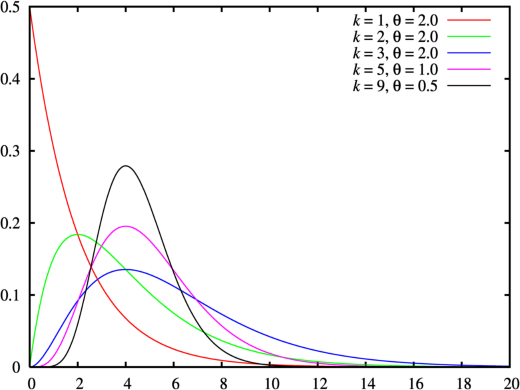

**Pseudocodigo:**

Entrada: α (entero positivo), λ (tasa)

Inicializar suma ← 0

Repetir α veces:

    Generar u ← número aleatorio uniforme en (0,1)
    x ← -ln(u) / λ
    suma ← suma + x
    
Devolver suma

**Codigo Python:**

In [ ]:
import numpy as np

def gamma_entero(alpha, lamb):
    if alpha <= 0 or not isinstance(alpha, int):
        raise ValueError("α debe ser un entero positivo")
    if lamb <= 0:
        raise ValueError("λ debe ser mayor que cero")

    suma = 0
    for _ in range(alpha):
        u = np.random.rand()
        suma += -np.log(u) / lamb
    return suma

# Ejemplo de uso
print(gamma_entero(3, 2))  # α = 3, λ = 2

##WEIBULL

## Distribución Weibull

Es una distribución continua usada frecuentemente en análisis de confiabilidad y vida útil de componentes.

**Parámetros:**

- $k$: parámetro de forma (shape)
- $\lambda$: parámetro de escala (scale)

**Función de densidad:**

$$
f(x) = \frac{k}{\lambda} \left( \frac{x}{\lambda} \right)^{k - 1} e^{-(x/\lambda)^k}, \quad x \geq 0
$$

**Media:**

$$
\lambda \, \Gamma\left(1 + \frac{1}{k} \right)
$$

**Varianza:**

$$
\lambda^2 \left[ \Gamma\left(1 + \frac{2}{k} \right) - \left( \Gamma\left(1 + \frac{1}{k} \right) \right)^2 \right]
$$

**Desviación estándar:**

$$
\sqrt{\text{Varianza}}
$$

Con graficas:

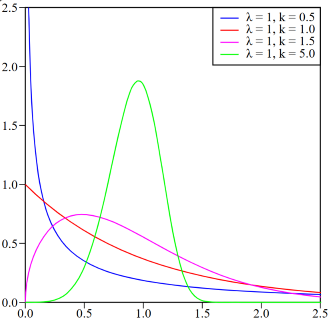

P. Acumulada:

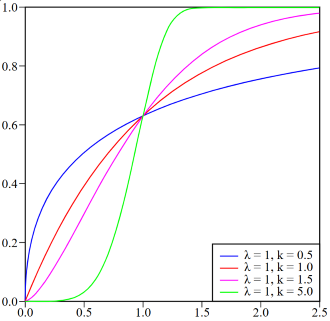

**Pseudocodigo:**

Entrada: k (forma), λ (escala)

Generar u ← número aleatorio uniforme en (0,1)

x ← λ * ( -ln(1 - u) )^(1 / k)

Devolver x

**Codigo Python:**

In [ ]:
import numpy as np

def weibull(k, lamb):
    if k <= 0 or lamb <= 0:
        raise ValueError("Los parámetros k y λ deben ser positivos")

    u = np.random.rand()
    x = lamb * (-np.log(1 - u))**(1 / k)
    return x

# Ejemplo de uso
print(weibull(1.5, 2))  # k = 1.5, λ = 2

## DISTRIBUCIÓN NORMAL

Es una de las distribuciones más importantes en estadística. Describe fenómenos naturales y errores de medición.

**Parámetros:**

- $\mu$: media
- $\sigma$: desviación estándar

**Función de densidad:**

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}, \quad -\infty < x < \infty
$$

**Media:**

$$
\mu
$$

**Varianza:**

$$
\sigma^2
$$

**Desviación estándar:**

$$
\sigma
$$

Con graficas:

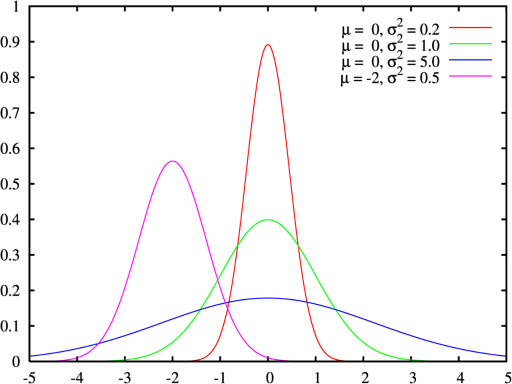

P. Acumulada:

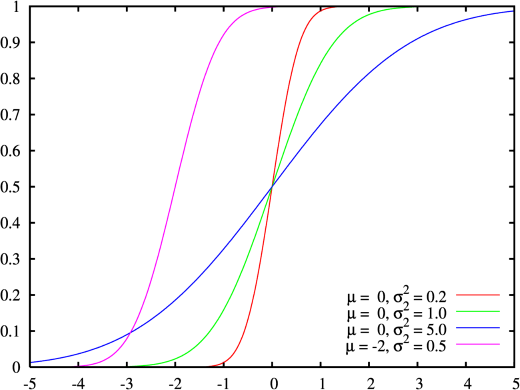

**Pseudocodigo:**

Entrada: μ, σ

Repetir:

    Generar U1, U2 uniformes en (0, 1)
    V1 ← 2 * U1 - 1
    V2 ← 2 * U2 - 1
    S ← V1² + V2²

Hasta que S < 1


Z ← V1 * sqrt( -2 * ln(S) / S )

X ← μ + σ * Z

Devolver X

**Codigo Pyython:**

In [ ]:
import math
import random

def normal(mu, sigma):
    while True:
        u1 = random.uniform(0, 1)
        u2 = random.uniform(0, 1)
        v1 = 2 * u1 - 1
        v2 = 2 * u2 - 1
        s = v1**2 + v2**2
        if s < 1 and s != 0:
            z = v1 * math.sqrt(-2 * math.log(s) / s)
            return mu + sigma * z

# Ejemplo:
print(normal(0, 1))

## DISTRIBUCION LOG-NORMAL

Una variable tiene distribución log-normal si su logaritmo tiene distribución normal.

**Parámetros:**

- $\mu$: media del logaritmo natural
- $\sigma$: desviación estándar del logaritmo

**Función de densidad:**

$$
f(x) = \frac{1}{x \sigma \sqrt{2\pi}} e^{ -\frac{(\ln x - \mu)^2}{2\sigma^2} }, \quad x > 0
$$

**Media:**

$$
e^{\mu + \frac{\sigma^2}{2}}
$$

**Varianza:**

$$
\left( e^{\sigma^2} - 1 \right) e^{2\mu + \sigma^2}
$$

**Desviación estándar:**

$$
\sqrt{\text{Varianza}}
$$

Con graficas:

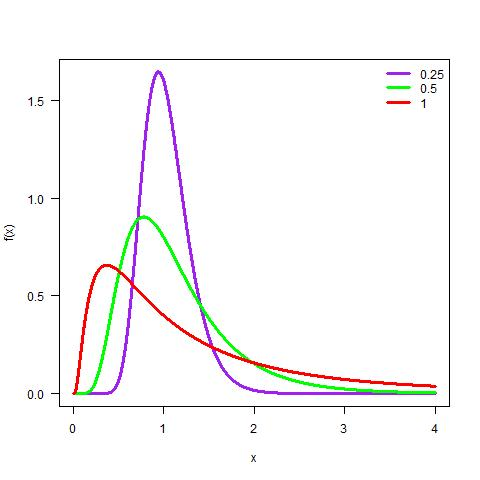

P. Acumulada:

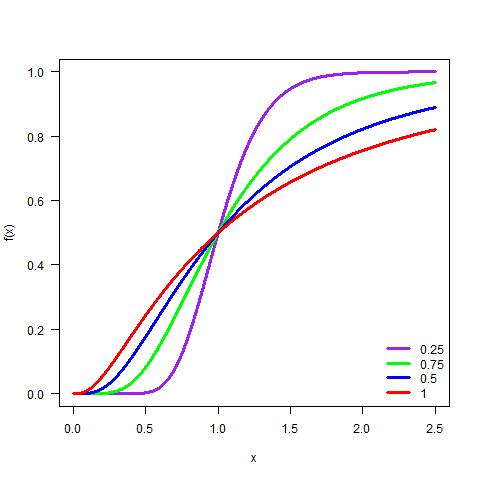

**Pseudocodigo:**

Entrada: μ, σ

Generar Z ← número con distribución Normal estándar usando pseudocódigo anterior

X ← exp( μ + σ * Z )

Devolver X


**Codigo Python:**

In [ ]:
def lognormal(mu, sigma):
    z = normal(0, 1)
    x = math.exp(mu + sigma * z)
    return x

# Ejemplo:
print(lognormal(0, 0.25))

## Distribución Beta

La distribución Beta es una distribución continua definida en el intervalo (0, 1) que se utiliza para modelar probabilidades y proporciones.

**Parámetros:**

- $\alpha > 0$: parámetro de forma
- $\beta > 0$: parámetro de forma

**Función de densidad:**

$$
f(x) = \frac{x^{\alpha - 1}(1 - x)^{\beta - 1}}{B(\alpha, \beta)}, \quad 0 < x < 1
$$

donde:

$$
B(\alpha, \beta) = \int_0^1 t^{\alpha - 1}(1 - t)^{\beta - 1} \, dt = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

**Media:**

$$
\frac{\alpha}{\alpha + \beta}
$$

**Varianza:**

$$
\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
$$

Con graficas:

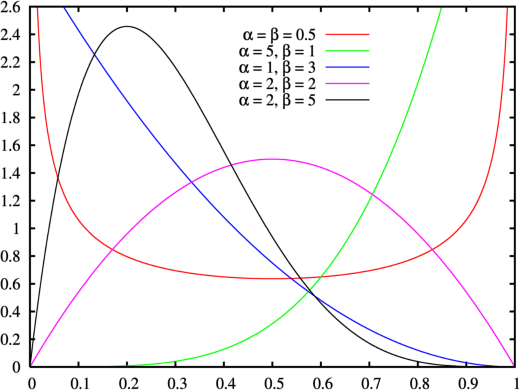

P. Acumulada:

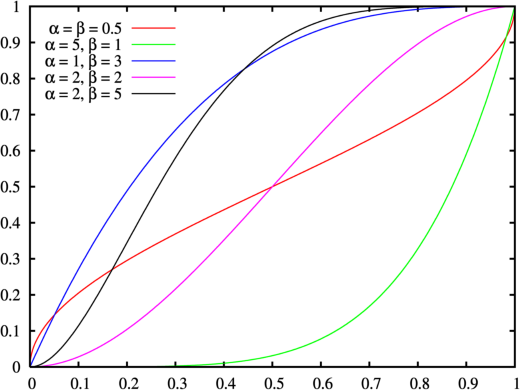

In [ ]:
**Pseudocodigo:**

Entrada: α, β

Generar Y1 ← variable Gamma con α y escala 1

Generar Y2 ← variable Gamma con β y escala 1

X ← Y1 / (Y1 + Y2)

Devolver X


**Codigo Python**

In [ ]:
import math
import random

def gamma(alpha):
    if alpha < 1:
        return gamma(1 + alpha) * (random.uniform(0, 1) ** (1 / alpha))
    d = alpha - 1/3
    c = 1 / math.sqrt(9 * d)
    while True:
        z = normal(0, 1)
        u = random.uniform(0, 1)
        v = (1 + c * z) ** 3
        if v > 0 and math.log(u) < 0.5 * z**2 + d - d * v + d * math.log(v):
            return d * v

def beta(alpha, beta_):
    y1 = gamma(alpha)
    y2 = gamma(beta_)
    return y1 / (y1 + y2)

# Ejemplo
print(beta(2, 5))

## Pearson Tipo III

Es una forma especial de la distribución Gamma, utilizada cuando la variable aleatoria puede tener una asimetría pronunciada.

**Parámetros:**

- $\mu$: ubicación (desplazamiento)
- $\alpha$: forma
- $\beta$: escala

**Función de densidad:**

$$
f(x) = \frac{1}{\Gamma(\alpha) \beta^{\alpha}} (x - \mu)^{\alpha - 1} e^{- \frac{x - \mu}{\beta}}, \quad x > \mu
$$

**Media:**

$$
\mu + \alpha \beta
$$

**Varianza:**

$$
\alpha \beta^2
$$

Con Graficas:

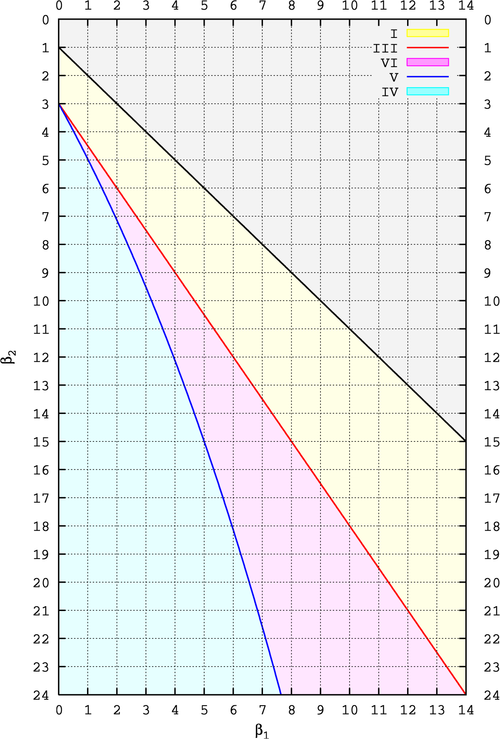

**Pseudocodigo:**

Entrada: α, β, μ

Generar Y ← variable Gamma con parámetros α, β

X ← Y + μ

Devolver X

**Codigo Python:**

In [ ]:
def pearson_type_III(alpha, beta, mu):
    y = gamma(alpha) * beta  # Ya tenemos función gamma definida antes
    return y + mu

# Ejemplo
print(pearson_type_III(2, 1.5, 3))

## Log-Logística

Es una distribución continua cuya forma es similar a la log-normal, pero con colas más pesadas. Se usa para modelar tiempos de falla.

**Parámetros:**

- $\alpha > 0$: escala
- $\beta > 0$: forma

**Función de densidad:**

$$
f(x) = \frac{(\beta/\alpha)(x/\alpha)^{\beta - 1}}{[1 + (x/\alpha)^{\beta}]^2}, \quad x > 0
$$

**Media (si $\beta > 1$):**

$$
\mu = \alpha \frac{\pi/\beta}{\sin(\pi/\beta)}
$$

**Varianza (si $\beta > 2$):** Existe pero tiene fórmula compleja.

Graficas:

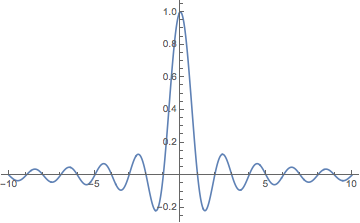

**Pseudocodigo:**

Entrada: α, β

Generar U ← uniforme(0,1)

X ← α * (U / (1 - U))^(1/β)

Devolver X

**Codigo Python:**


In [ ]:
def loglogistica(alpha, beta):
    u = random.uniform(0, 1)
    return alpha * (u / (1 - u)) ** (1 / beta)

# Ejemplo
print(loglogistica(2, 3))

## Distribución Johnson SU

Es una transformación de la normal estándar para modelar distribuciones con colas pesadas o asimetrías.

**Parámetros:**

- $\gamma$: ubicación
- $\delta > 0$: forma
- $\xi$: traslación (shift)
- $\lambda > 0$: escala

**Transformación:**

$$
Z = \gamma + \delta \sinh^{-1} \left( \frac{x - \xi}{\lambda} \right)
$$

donde $Z \sim N(0,1)$.

**Inversa (para generar datos):**

$$
X = \xi + \lambda \sinh \left( \frac{Z - \gamma}{\delta} \right)
$$

donde $Z$ es una variable normal estándar.

Graficas:

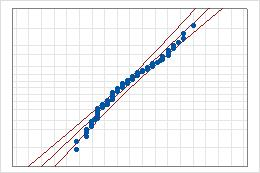

**Pseudocodigo:**

Entrada: γ, δ, ξ, λ

Generar Z ← normal estándar

X ← ξ + λ * sinh((Z - γ) / δ)

Devolver X

**Codigo Python:**

In [ ]:
def johnson_SU(gamma, delta, xi, lamb):
    z = normal(0, 1)  # Usa tu función normal
    return xi + lamb * math.sinh((z - gamma) / delta)

# Ejemplo
print(johnson_SU(0, 1, 0, 1))

#DISCRETAS

## Uniforme Discreta

Asigna igual probabilidad a cada uno de los valores enteros entre $a$ y $b$.

**Función de probabilidad:**

$$
P(X = x) = \frac{1}{b - a + 1}, \quad x = a, a+1, ..., b

Graficas:

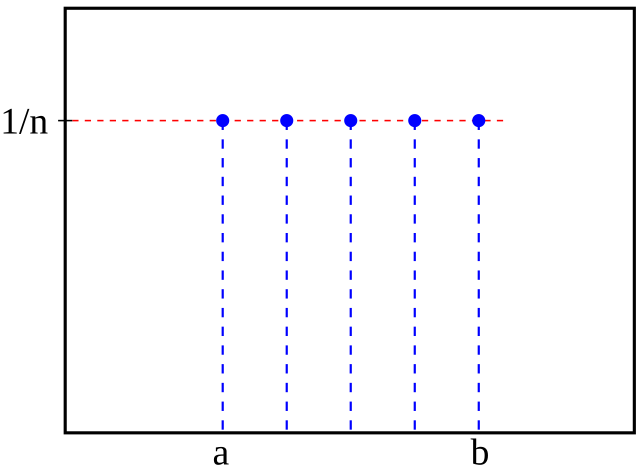

**Pseudocodigo:**

Entrada: a, b

Generar U ← uniforme(0,1)

X ← a + int((b - a + 1) * U)

Devolver X



**Codigo Python:**

In [ ]:
def uniforme_discreta(a, b):
    u = random.uniform(0, 1)
    return a + int((b - a + 1) * u)

# Ejemplo
print(uniforme_discreta(1, 6))

## Bernoulli

Distribución para un experimento con dos resultados posibles: éxito (1) con probabilidad $p$, y fracaso (0) con probabilidad $1 - p$.

**Función de probabilidad:**

$$
P(X = x) =
\begin{cases}
p, & \text{si } x = 1 \\
1 - p, & \text{si } x = 0
\end{cases}

Graficas:

Binomial_distribution_pmf.svg

P. Acumulada:

Binomial_distribution_cdf.svg

**Pseudocodigo:**

Entrada: p

Generar U ← uniforme(0,1)

Si U < p entonces X ← 1

Si no, X ← 0

Devolver X


**Codigo Python:**

In [ ]:
def bernoulli(p):
    u = random.uniform(0, 1)
    return 1 if u < p else 0

# Ejemplo
print(bernoulli(0.3))

## Geométrica

Modela el número de ensayos necesarios hasta obtener el **primer éxito** en una secuencia de ensayos de Bernoulli.

**Parámetro:**
- $p$: probabilidad de éxito

**Función de probabilidad:**

$$
P(X = x) = (1 - p)^{x - 1} p, \quad x = 1, 2, 3, \ldots
$$

Graficas:

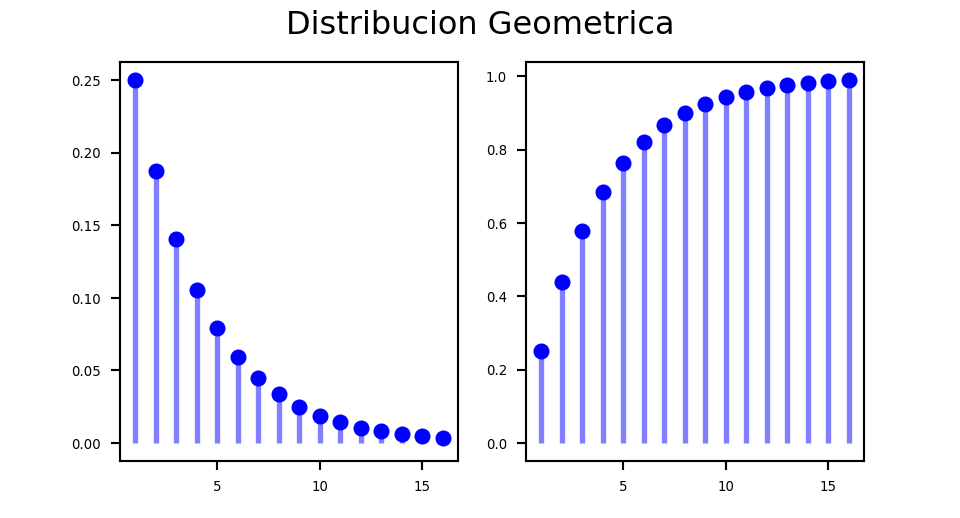

**Pseudocodigo:**

Entrada: p

x ← 1

Mientras True hacer

Generar U ← uniforme(0,1)

Si U < p entonces

Devolver x

Si no, x ← x + 1

**Codigo Python:**

In [ ]:
def geometrica(p):
    x = 1
    while True:
        u = random.uniform(0, 1)
        if u < p:
            return x
        x += 1

# Ejemplo
print(geometrica(0.2))

## Binomial Negativa

Modela el número de ensayos necesarios para obtener **r éxitos** en una secuencia de ensayos de Bernoulli.

**Parámetros:**
- $r$: número de éxitos
- $p$: probabilidad de éxito

**Función de probabilidad:**

$$
P(X = x) = \binom{x - 1}{r - 1} p^r (1 - p)^{x - r}, \quad x = r, r+1, r+2, \ldots
$$

Grafica:

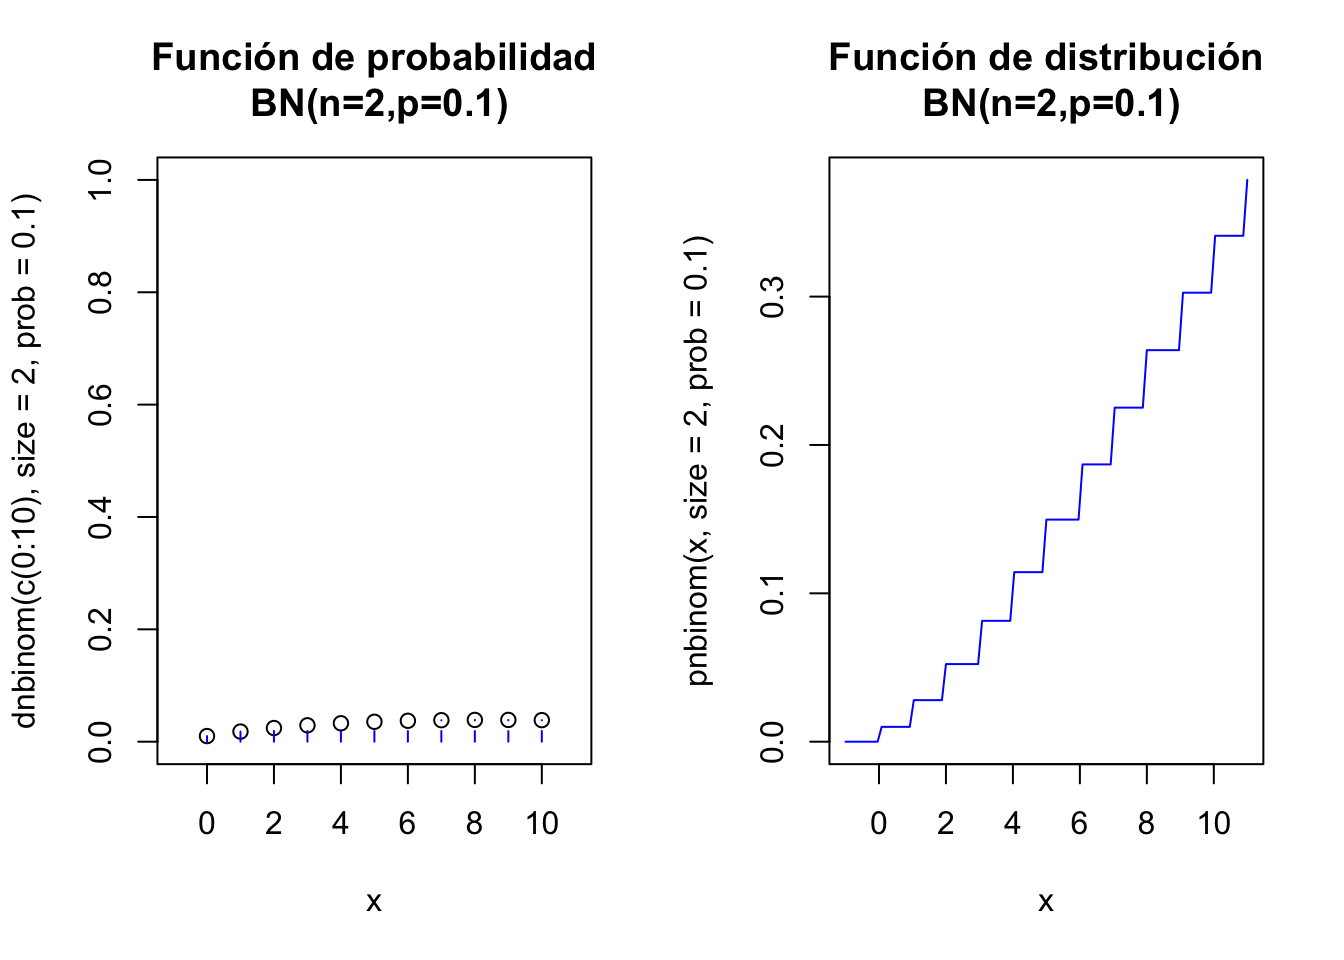

**Pseudocodigo:**

Entrada: r, p

x ← 0

éxitos ← 0

Mientras éxitos < r hacer

Generar U ← uniforme(0,1)

x ← x + 1

Si U < p entonces

éxitos ← éxitos + 1

Devolver x

**Codigo Python:**

In [ ]:
def binomial_negativa(r, p):
    x = 0
    exitos = 0
    while exitos < r:
        u = random.uniform(0, 1)
        x += 1
        if u < p:
            exitos += 1
    return x

print(binomial_negativa(3, 0.4))

## Poisson

Modela el número de eventos que ocurren en un intervalo fijo de tiempo o espacio, bajo una tasa constante.

**Parámetro:**
- $\lambda$: número promedio de eventos por intervalo

**Función de probabilidad:**

$$
P(X = x) = \frac{e^{-\lambda} \lambda^x}{x!}, \quad x = 0, 1, 2, \ldots
$$

Graficas:

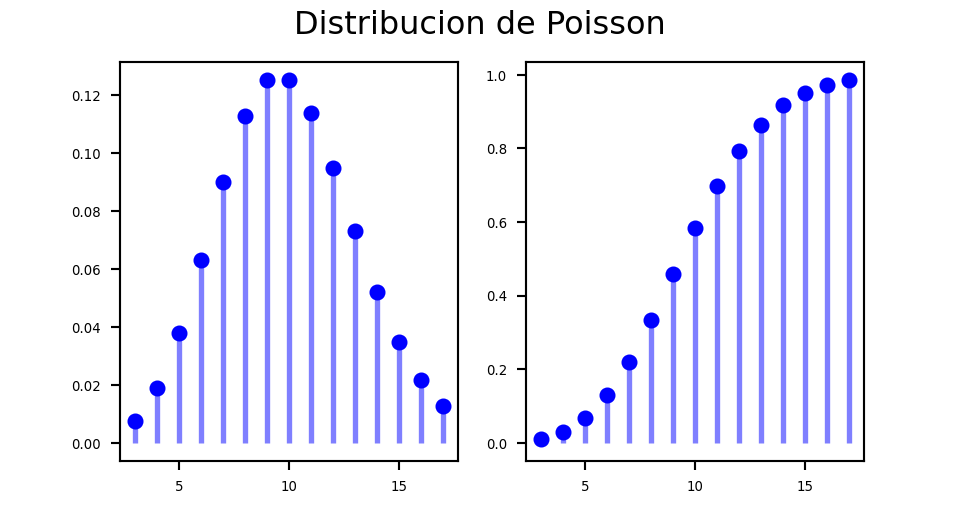

**Pseudocodigo:**

Entrada: λ

L ← e^(-λ)

k ← 0

p ← 1


Mientras p > L hacer

Generar U ← uniforme(0,1)

p ← p * U

k ← k + 1

Devolver k - 1

**Codigo Python:**

In [ ]:
def poisson(lamb):
    L = math.exp(-lamb)
    k = 0
    p = 1
    while p > L:
        u = random.uniform(0, 1)
        p *= u
        k += 1
    return k - 1

# Ejemplo
print(poisson(3))